In [1]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
import pickle

# Settings
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Defs
def stats(dataset):
    # Plot
    hist = pickle.load(open(f'/traces/{dataset}/hist_100.pickle','rb'))
    hist.suptitle(dataset)
    hist.set_size_inches(6, 3)
    axs = hist.get_axes()
    axs[0].set_xlabel('addresses')
    axs[1].set_xlabel('deltas')
    # Stats
    return pd.read_csv(f'/traces/{dataset}/stats.csv', index_col=0).round(5)

,stats
trace len,45798421.00000
unique addr,28772.00000
unique deltas,32911.00000
rare deltas (< 10),7.00000
unique deltas (no rare),32904.00000
deltas (no rare),45798412.00000
deltas 50% mass,16456.00000
deltas 50K coverage,1.51925


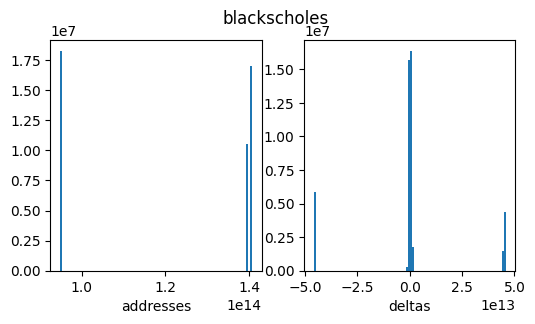

In [2]:
stats('blackscholes')

,stats
trace len,200646894.00000
unique addr,3694464.00000
unique deltas,5725838.00000
rare deltas (< 10),5475157.00000
unique deltas (no rare),250681.00000
deltas (no rare),182506387.00000
deltas 50% mass,2862919.00000
deltas 50K coverage,0.00873


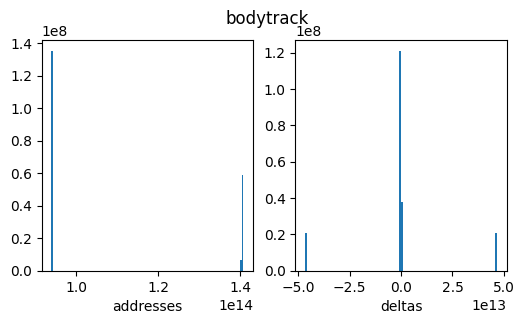

In [3]:
stats('bodytrack')

,stats
trace len,71525175.00000
unique addr,1858297.00000
unique deltas,3295292.00000
rare deltas (< 10),2909996.00000
unique deltas (no rare),385296.00000
deltas (no rare),60419484.00000
deltas 50% mass,1647646.00000
deltas 50K coverage,0.01517


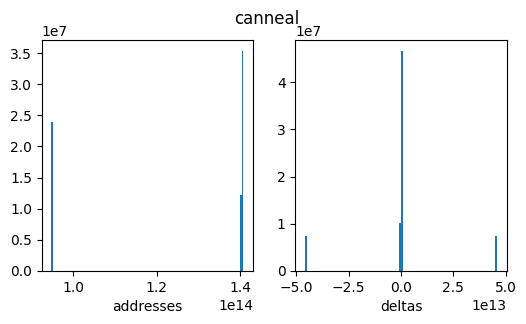

In [3]:
stats('canneal')

,stats
trace len,910647044.00000
unique addr,22065036.00000
unique deltas,18498476.00000
rare deltas (< 10),17148575.00000
unique deltas (no rare),1349901.00000
deltas (no rare),877303444.00000
deltas 50% mass,9249238.00000
deltas 50K coverage,0.00270


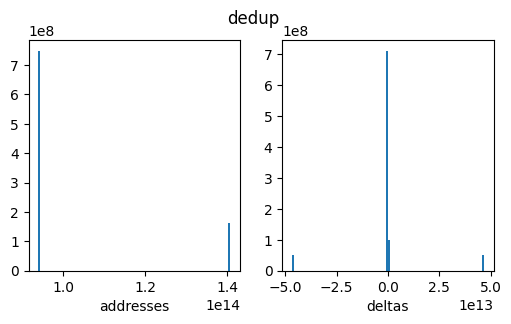

In [5]:
stats('dedup')

,stats
trace len,9000131405.00000
unique addr,46072671.00000
unique deltas,68133122.00000
rare deltas (< 10),34513153.00000
unique deltas (no rare),33619969.00000
deltas (no rare),8900490457.00000
deltas 50% mass,34066561.00000
deltas 50K coverage,0.00073


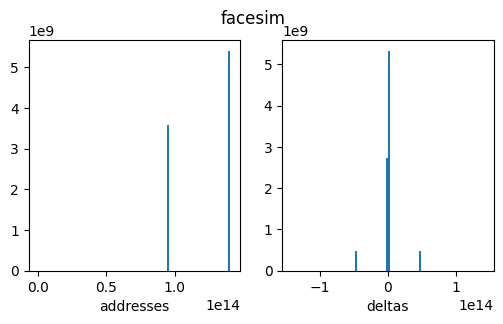

In [6]:
stats('facesim')

,stats
trace len,820532874.00000
unique addr,3600459.00000
unique deltas,39539893.00000
rare deltas (< 10),35237039.00000
unique deltas (no rare),4302854.00000
deltas (no rare),734987740.00000
deltas 50% mass,19769947.00000
deltas 50K coverage,0.00126


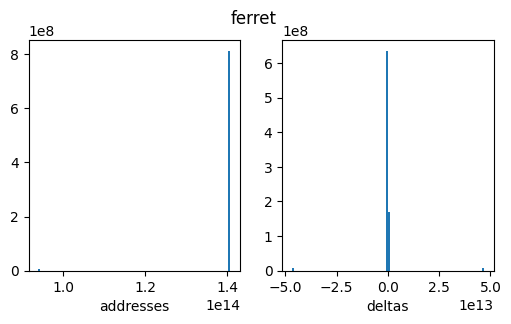

In [7]:
stats('ferret')

,stats
trace len,303744991.00000
unique addr,1442013.00000
unique deltas,2910213.00000
rare deltas (< 10),2293510.00000
unique deltas (no rare),616703.00000
deltas (no rare),295216850.00000
deltas 50% mass,1455107.00000
deltas 50K coverage,0.01718


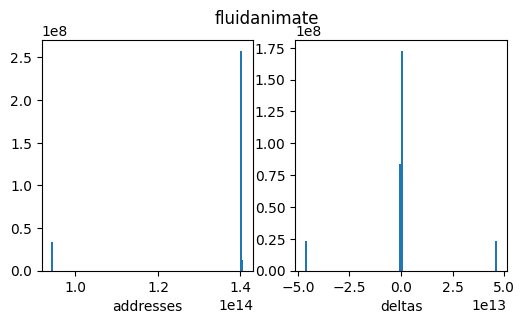

In [8]:
stats('fluidanimate')

,stats
trace len,685619368.00000
unique addr,13037383.00000
unique deltas,32688161.00000
rare deltas (< 10),28017441.00000
unique deltas (no rare),4670720.00000
deltas (no rare),627082521.00000
deltas 50% mass,16344081.00000
deltas 50K coverage,0.00153


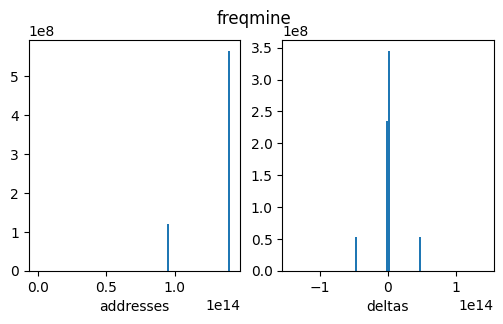

In [9]:
stats('freqmine')

,stats
trace len,416028166.00000
unique addr,3184096.00000
unique deltas,3604303.00000
rare deltas (< 10),3542882.00000
unique deltas (no rare),61421.00000
deltas (no rare),408192723.00000
deltas 50% mass,1802152.00000
deltas 50K coverage,0.01387


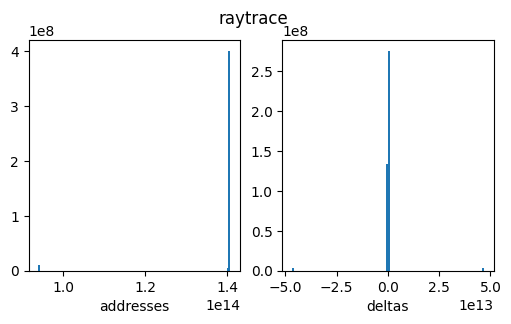

In [10]:
stats('raytrace')

,stats
trace len,451275602.00000
unique addr,166392.00000
unique deltas,422809.00000
rare deltas (< 10),269895.00000
unique deltas (no rare),152914.00000
deltas (no rare),450816777.00000
deltas 50% mass,211405.00000
deltas 50K coverage,0.11826


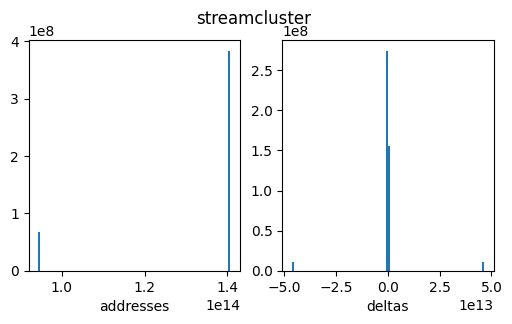

In [11]:
stats('streamcluster')

,stats
trace len,617667587.00000
unique addr,49275.00000
unique deltas,78622.00000
rare deltas (< 10),3450.00000
unique deltas (no rare),75172.00000
deltas (no rare),617662210.00000
deltas 50% mass,39311.00000
deltas 50K coverage,0.63595


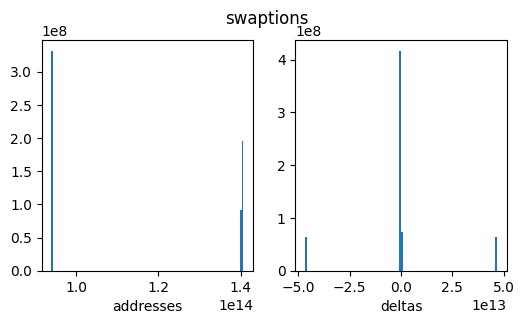

In [12]:
stats('swaptions')

,stats
trace len,991275189.00000
unique addr,8028878.00000
unique deltas,14490237.00000
rare deltas (< 10),12852999.00000
unique deltas (no rare),1637238.00000
deltas (no rare),958473291.00000
deltas 50% mass,7245119.00000
deltas 50K coverage,0.00345


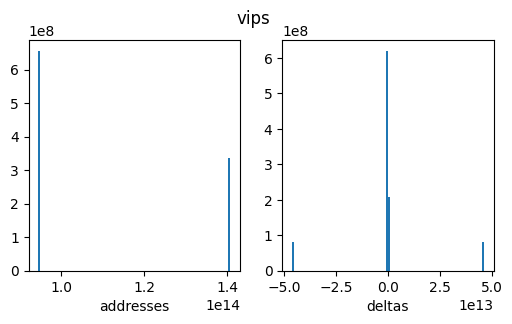

In [13]:
stats('vips')

,stats
trace len,223436703.00000
unique addr,3717356.00000
unique deltas,6144068.00000
rare deltas (< 10),5663072.00000
unique deltas (no rare),480996.00000
deltas (no rare),208294721.00000
deltas 50% mass,3072034.00000
deltas 50K coverage,0.00814


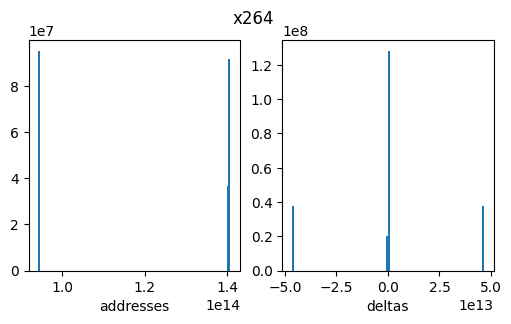

In [14]:
stats('x264')